In [7]:
import pandas as pd

# අපේ අලුත් CSV ෆයිල් එක කියවමු
df = pd.read_csv('ICC Mens T20 Worldcup.csv')

# දත්ත ගොනුවේ තියෙන මුල් පේළි 5 බලමු
df.head()


# 1. පේළි සහ තීරු කීයක් තියෙනවද බලමු (Rows & Columns)
print("Rows & Columns:", df.shape)

# 2. දත්ත වර්ග සහ හිස් තැන් ගැන විස්තර (Data Types & Info)
print("\n--- Data Info ---\n")
df.info()

# 3. හිස් කොටු (Null Values) කීයක් තියෙනවද හරියටම බලමු
print("\n--- Missing Values ---\n")
print(df.isnull().sum())

# 1. පේළි සහ තීරු කීයක් තියෙනවද බලමු (Rows & Columns)
print("Rows & Columns:", df.shape)

# 2. දත්ත වර්ග සහ හිස් තැන් ගැන විස්තර (Data Types & Info)
print("\n--- Data Info ---\n")
df.info()

# 3. හිස් කොටු (Null Values) කීයක් තියෙනවද හරියටම බලමු
print("\n--- Missing Values ---\n")
print(df.isnull().sum())

Rows & Columns: (55, 22)

--- Data Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Match No.                          55 non-null     object
 1   Date                               55 non-null     object
 2   Venue                              55 non-null     object
 3   1st Team                           55 non-null     object
 4   2nd Team                           55 non-null     object
 5   Stage                              55 non-null     object
 6   Toss Winning                       55 non-null     object
 7   Toss Decision                      55 non-null     object
 8   First Innings Score                55 non-null     object
 9   Fall of wickets First Innings      55 non-null     object
 10  Second Innings Score               55 non-null     object
 11  Fall of wickets Second Innin

In [8]:
# 1. ඩබල් වෙලා තියෙන පේළි අයින් කරමු (Drop Duplicates)
df.drop_duplicates(inplace=True)

# 2. 'Date' තීරුව හරිම DateTime ආකෘතියට හරවමු
# (සමහර විට Date එක තියෙන්නේ 'match_date' හෝ 'date' නමින් වෙන්න පුළුවන්. 
# ඔයාගේ කලින් Output එකේ තිබ්බ නම බලන්න. අපි හිතමු 'date' කියලා)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 3. දිනපු කෙනෙක් නැති (Winner හිස්) මැච් අයින් කරමු
# (Winner නැත්නම් අපිට දිනුම් පැරදුම් බලන්න බැරි නිසා)
df.dropna(subset=['Winners'], inplace=True)

# 4. දැන් පිරිසිදු දත්ත ටික බලමු
print("Cleaning Complete!")
print("New Shape:", df.shape)
df.head()

Cleaning Complete!
New Shape: (55, 22)


,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
0,1st,"Saturday,June 1,2024","Grand Prairie Stadium, Dallas",Canada,United State Of America,Group A,United State Of America,Fielding,194,5,...,United State Of America,Normal Match,Wickets,7,Aaron Jones,94,Dilon Heyliger,1,19,Aaron Jones
1,2nd,"Sunday,June 2,2024","Providence Stadium, Guyana",Papua New Guinea,Afghanistan,Group C,Afghanistan,Fielding,95,10,...,Afghanistan,Normal Match,Wickets,7,Gulbadin Naib,49,Fazalhaq Farooqi,3,16,Fazalhaq Farooqi
2,3rd,"Sunday,June 2,2024","Kensington Oval, Bridgetown, Barbados",Oman,Namibia,Group B,Namibia,Fielding,109,10,...,Namibia,Normal Match,Wickets,4,Jan Frylinck,45,Mehran Khan,3,7,David Wiese
3,4th,"Monday,June 3,2024","Nassau County International Cricket Stadium, N...",Sri Lanka,South Africa,Group D,Sri Lanka,Batting,77,10,...,South Africa,Normal Match,Wickets,6,Quinton de Kock,20,Anrich Nortje,4,7,Anrich Nortje
4,5th,"Monday,June 3,2024","Providence Stadium, Guyana",Afghanistan,Uganda,Group C,Uganda,Fielding,183,5,...,Afghanistan,Normal Match,Runs,125,Rahmanullah Gurbaz,76,Fazalhaq Farooqi,5,9,Fazalhaq Farooqi


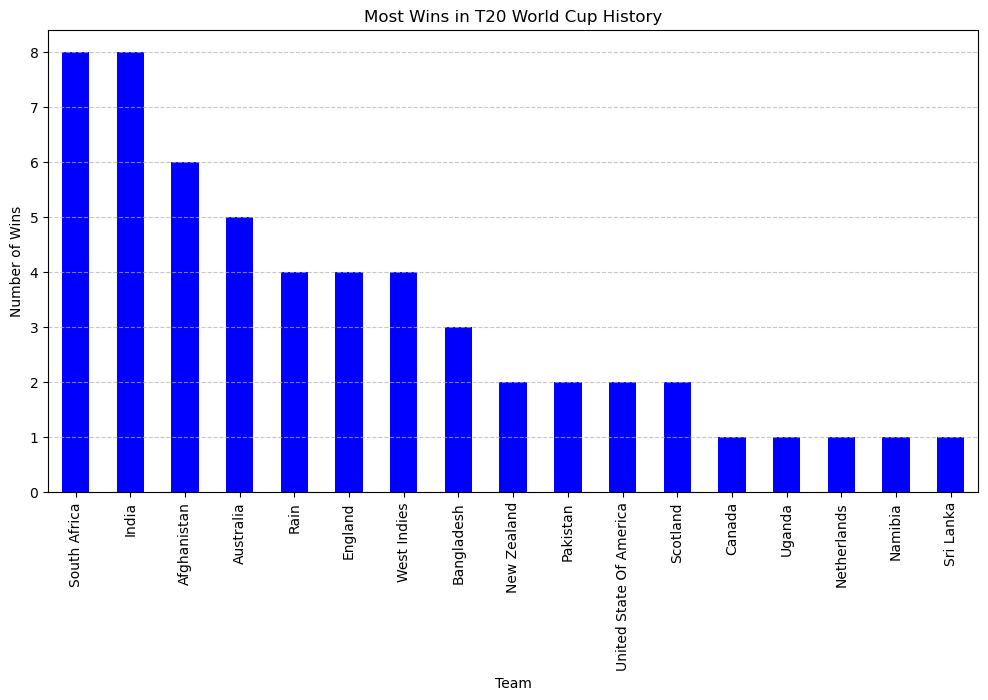

In [9]:
import matplotlib.pyplot as plt

# 1. දිනපු රටවල් ගණන් කරමු (Count wins per team)
winner_counts = df['Winners'].value_counts()

# 2. Bar Chart එක අඳිමු
plt.figure(figsize=(12, 6)) # Chart එකේ ප්‍රමාණය (පළල, උස)
winner_counts.plot(kind='bar', color='blue')

# 3. මාතෘකා සහ නම් දාමු
plt.title('Most Wins in T20 World Cup History')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90) # රටවල් වල නම් කියවන්න ලේසි වෙන්න ඇල කරමු
plt.grid(axis='y', linestyle='--', alpha=0.7) # පිටුපසින් ඉරි කෑලි දාමු

# 4. පෙන්වන්න
plt.show()

In [10]:
print(df.columns)

Index(['Match No.', 'Date', 'Venue', '1st Team', '2nd Team', 'Stage',
       'Toss Winning', 'Toss Decision', 'First Innings Score',
       'Fall of wickets First Innings', 'Second Innings Score',
       'Fall of wickets Second Innings', 'Winners', 'Method', 'Won by',
       'Winning Margin', 'Top Scorer', 'Highest Score', 'Best Bowler',
       'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)', 'Player Of The Match'],
      dtype='object')


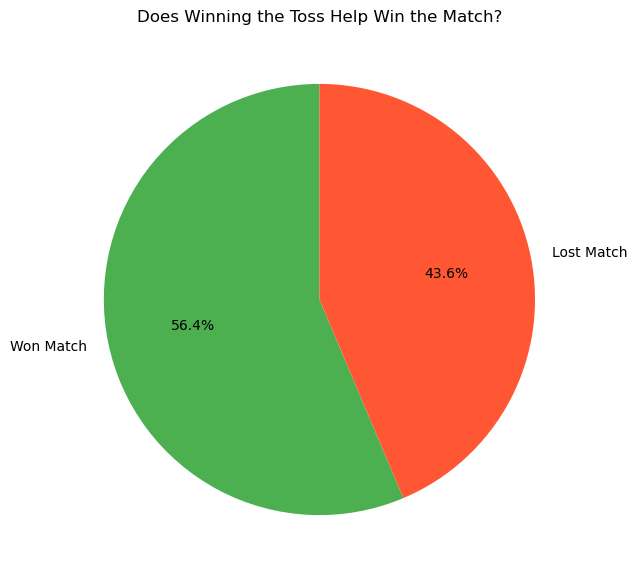

In [11]:
import matplotlib.pyplot as plt

# කාසියේ වාසිය දිනපු කණ්ඩායමම (Toss Winning) මැච් එකත් දිනලාද (Winners) කියලා බලමු
toss_match_wins = df[df['Toss Winning'] == df['Winners']]

# ගණන් කරමු
win_count = len(toss_match_wins)
total_matches = len(df)
loss_count = total_matches - win_count

# ප්‍රතිශතය (Percentage) Pie Chart එකකින් පෙන්වමු
labels = ['Won Match', 'Lost Match']
sizes = [win_count, loss_count]
colors = ['#4CAF50', '#FF5733'] # කොළ (දිනපු) සහ රතු (පැරදුනු) පාට

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Does Winning the Toss Help Win the Match?')
plt.show()

/var/folders/0x/71dmzc652fv263866fbx6q4c0000gn/T/ipykernel_3926/101617841.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pom_counts.index, y=pom_counts.values, palette='viridis')


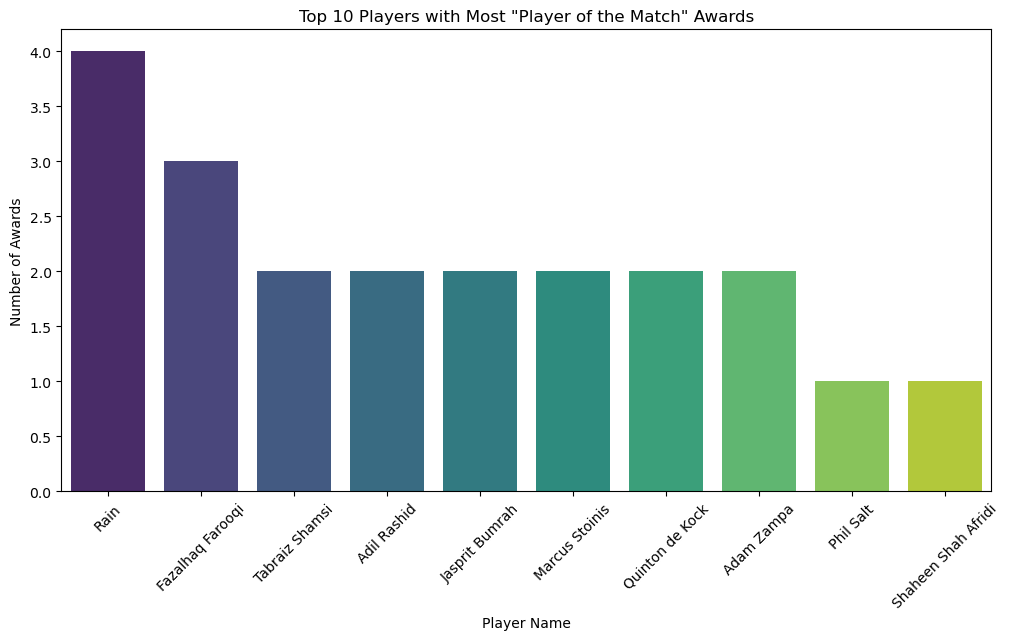

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. වැඩිම වාර ගණනක් 'Player Of The Match' වුනු මුල් 10 දෙනා තෝරමු
pom_counts = df['Player Of The Match'].value_counts().head(10)

# 2. ලස්සන Bar Chart එකක් අඳිමු
plt.figure(figsize=(12, 6))
sns.barplot(x=pom_counts.index, y=pom_counts.values, palette='viridis')

plt.title('Top 10 Players with Most "Player of the Match" Awards')
plt.xlabel('Player Name')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45) # නම් කියවන්න ලේසි වෙන්න ඇල කරමු
plt.show()

In [13]:
# 1. '1st Team' හෝ '2nd Team' විදියට ශ්‍රී ලංකාව හිටපු මැච් ටික තෝරගමු
sl_matches = df[(df['1st Team'] == 'Sri Lanka') | (df['2nd Team'] == 'Sri Lanka')]

# 2. ඒ මැච් වල ප්‍රතිඵල ටික බලාගමු
print("Total Matches Played by Sri Lanka:", len(sl_matches))
print("\n--- Match Results ---\n")
print(sl_matches[['Date', '1st Team', '2nd Team', 'Winners', 'Won by', 'Winning Margin']])

Total Matches Played by Sri Lanka: 4

--- Match Results ---

                    Date   1st Team      2nd Team       Winners   Won by  \
3     Monday,June 3,2024  Sri Lanka  South Africa  South Africa  Wickets   
14    Friday,June 7,2024  Sri Lanka    Bangladesh    Bangladesh  Wickets   
22  Tuesday,June 11,2024      Nepal     Sri Lanka          Rain     Rain   
37   Sunday,June 16,2024  Sri Lanka   Netherlands     Sri Lanka     Runs   

   Winning Margin  
3               6  
14              2  
22           Rain  
37             83  
